![ieseg logo](./img/ieseg.png)

#### MBD 2020-2021
# Statistical & Machine Learning Approaches for Marketing

## Homework Section 2: Classification

### 1. Import all required libraries and datasets

In [3]:
# Install missing packages
install.packages(c("data.table", "mlr3", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))
install.packages(c("mlr", "pROC", "e1071", "gridExtra", "kknn", "nnet", "dummies"))

Warning message:
"package 'datasets' is not available (for R version 3.6.1)"Warning message:
"package 'datasets' is a base package, and should not be updated"Warning message:
"package 'data.table' is in use and will not be installed"

package 'mlr3' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'ISLR' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\pbhurji\.conda\envs\r-environment\Lib\R\library\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\pbhurji\.conda\envs\r-environment\Lib\R\library\MASS\libs\x64\MASS.dll: Permission denied"Warning message:
"restored 'MASS'"


The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\RtmpyKY3wT\downloaded_packages


also installing the dependencies 'ParamHelpers', 'BBmisc', 'data.table', 'parallelMap', 'XML'

Warning message:
"package 'data.table' is in use and will not be installed"

package 'ParamHelpers' successfully unpacked and MD5 sums checked
package 'BBmisc' successfully unpacked and MD5 sums checked
package 'parallelMap' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'mlr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\RtmpyKY3wT\downloaded_packages


In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing

# Import data
library(ISLR)        # Data from the course book
library(MASS)        # Boston housing dataset
library(datasets)    # US crime dataset

# Resize plot
library(repr)        # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

ERROR: Error in library(mlr): there is no package called 'mlr'


## Homework
- Exercise 6 (p.170, Chap.4), 8 (p.170, Chap.4), 9 (p.170, Chap.4), 10 (p.171, Chap.4) and 11 (p.171, Chap.4).

### Exercise 6 (p.170, Chap.4)

QUESTION - Suppose we collect data for a group of students in a statistics class
with variables X1 =hours studied, X2 =undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, ˆ β0 = −6, ˆβ1 = 0.05, ˆβ2 = 1. <br/>
(a) Estimate the probability that a student who studies for 40 h and
has an undergrad GPA of 3.5 gets an A in the class. <br/>
(b) How many hours would the student in part (a) need to study to
have a 50% chance of getting an A in the class?

ANSWER - <br/>

According to Given data - <br/> p(X)=exp(β0+β1X1+β2X2)1+exp(β0+β1X1+β2X2) <br/> X1=hoursstudied, X2=undergradGPA <br/>  β0=−6,β1=0.05,β2=1 <br/>


(a) <br/>
X=[40hours,3.5GPA]<br/>
p(X)=exp(−6+0.05X1+X2)1+exp(−6+0.05X1+X2)<br/>
=exp(−6+0.0540+3.5)1+exp(−6+0.0540+3.5)<br/>
=exp(−0.5)1+exp(−0.5)<br/>
=37.75%

(b) <br/>
X=[X1hours,3.5GPA]<br/> p(X)=exp(−6+0.05X1+X2)1+exp(−6+0.05X1+X2)<br/>
0.50=exp(−6+0.05X1+3.5)1+exp(−6+0.05X1+3.5)<br/> 
0.50(1+exp(−2.5+0.05X1))=exp(−2.5+0.05X1)<br/>
0.50+0.50exp(−2.5+0.05X1))=exp(−2.5+0.05X1)<br/>
0.50=0.50exp(−2.5+0.05X1)<br/>
log(1)=−2.5+0.05X1<br/> 
X1=2.5/0.05=50hours

### Exercise 8 (p.170, Chap.4)

QUESTION - Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20% on the
training data and 30% on the test data. Next we use 1-nearest neighbors
(i.e. K = 1) and get an average error rate (averaged over both
test and training data sets) of 18%. Based on these results, which
method should we prefer to use for classification of new observations?
Why?

ANSWER - The KNN with K=1 model would fit the training set exactly and so the training error would be zero. This means the test error has to be 36% in order for the average of the errors to be 18%. As model selection is based on performance on the test set, we will choose logistic regression to classify new observations.

### Exercise 9 (p.170, Chap.4)

QUESTION - This problem has to do with odds. <br/> 
(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default? <br/> 
(b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default? <br/> 

ANSWER - <br/>
(a) <br/>
p(X)1−p(X)=0.37 <br/> 
p(X)=0.37(1−p(X))<br/> 
1.37p(X)=0.37<br/> 
p(X)=0.371.37=27%

(b) <br/>
odds=p(X)1−p(X)=.16/.84=0.19

### Exercise 10 (p.171, Chap.4)

ANSWER 10(a) - 

In [12]:
library(ISLR)
summary(Weekly)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

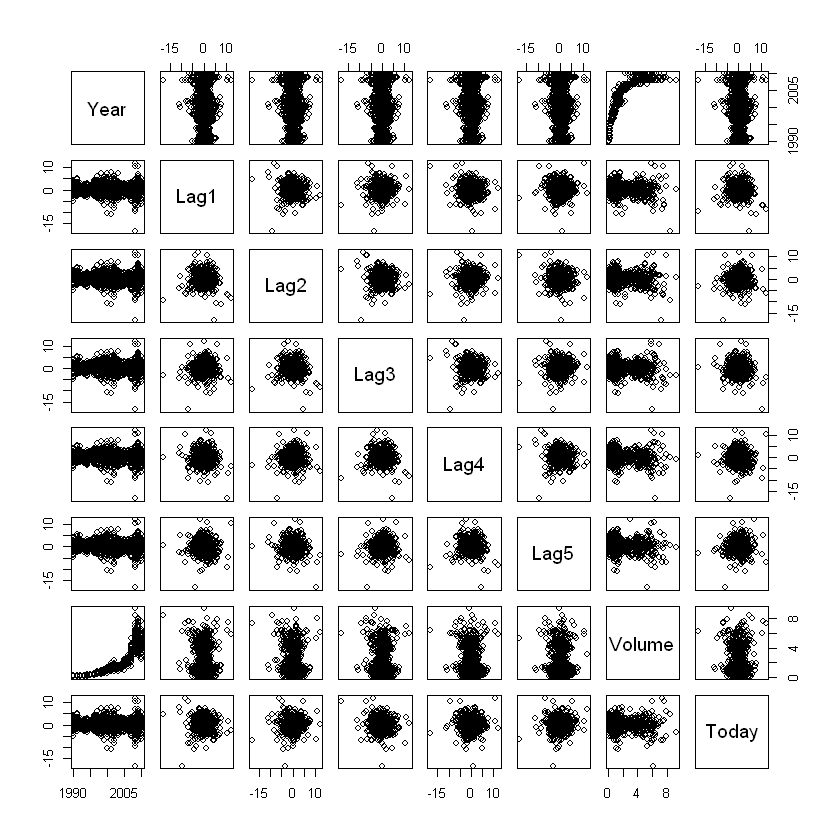

In [15]:
# Scatterplot Matrix
pairs(Weekly[,1:8])

In [16]:
# Correlation matrix.
cor(Weekly[,1:8])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


As can be seen on the scatterplot and correlation matrices, there appears to be a positive correlation between 'Year' and 'Volume' only. From the summary statistics, we can observe that the Lag variables are very similar to each other and 'Today'. There doesn't appear to to be any patterns except for an increase in volume from 1989 to 2001.

ANSWER 10(b) - 

In [25]:
logistic_fit = glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(logistic_fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 is statistically significant.

ANSWER 10(c) - 

In [26]:
logistic_probs = predict(logistic_fit, type="response")
logistic_preds = rep("Down", 1089) # Vector of 1089 "Down" elements.
logistic_preds[logistic_probs>0.5] = "Up" # Change "Down" to up when probability > 0.5.

# Confusion matrix
attach(Weekly)
table(logistic_preds,Direction)

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



              Direction
logistic_preds Down  Up
          Down   54  48
          Up    430 557

Overfall fraction of correct predictions is $\frac{54+557}{54+48+430+557} \approx0.56$ <br/>

The error rate of falsely predict down days to up is $\frac{48}{48+54} \approx0.47$ <br/>

The error rate of falsely predict up days to up is $\frac{430}{430+557} \approx0.44$ <br/>

ANSWER 10(d) - 

In [27]:
# Training observations from 1990 to 2008.
train = (Year<2009)

# Test observations from 2009 to 2010.
Test = Weekly[!train ,]
Test_Direction= Direction[!train]

# Logistic regression on training set.
logistic_fit2 = glm(Direction ~ Lag2, data=Weekly, family=binomial, subset=train)

# Predictions on the test set.
logistic_probs2 = predict(logistic_fit2,Test, type="response")
logistic_preds2 = rep("Down", 104) 
logistic_preds2[logistic_probs2>0.5] = "Up" 

# Confusion matrix.
table(logistic_preds2,Test_Direction)

               Test_Direction
logistic_preds2 Down Up
           Down    9  5
           Up     34 56

The model makes correct predictions on 65/104= 62.5% of the days.

ANSWER 10(e) - 

In [33]:
# Using LDA.
library(MASS)
lda_fit = lda(Direction ~ Lag2, data=Weekly, subset=train)
#lda_fit

# Predictions on the test set.
lda_pred = predict(lda_fit,Test)
lda_class = lda_pred$class

# Confusion matrix.
table(lda_class,Test_Direction)

Warning message:
"package 'MASS' was built under R version 3.6.3"

         Test_Direction
lda_class Down Up
     Down    9  5
     Up     34 56

Overall fraction of correct predictions for the held out data is $65/104\approx0.625$

ANSWER 10(f) - 

In [34]:
# Using QDA.
qda_fit = qda(Direction ~ Lag2, data=Weekly, subset=train)
qda_pred = predict(qda_fit,Test)
qda_class = qda_pred$class
table(qda_class,Test_Direction)

         Test_Direction
qda_class Down Up
     Down    0  0
     Up     43 61

QDA model's TPR=1 and precision(correct predictions)=0.58, which is no better than guessing each day is "Up"

ANSWER 10(g) - 

In [35]:
# Using KNN
library(class)
set.seed(1)
train_X = Weekly[train,3]
test_X = Weekly[!train,3]
train_direction = Direction[train]

# Changing from vector to matrix by adding dimensions
dim(train_X) = c(985,1)
dim(test_X) = c(104,1)

# Predictions for K=1
knn_pred = knn(train_X, test_X, train_direction, k=1)
table(knn_pred, Test_Direction)

        Test_Direction
knn_pred Down Up
    Down   21 30
    Up     22 31

KNN with K=1 in correct in its predictions for 50% of the days.

ANSWER 10(h) - 

  - Logistic regression, LDA give the exact same confusion matrix. The TPR = 0.92, Precision = 0.62, TNR = 0.21 and NPV(Negative Predictive Value) = 0.64. 
  - For KNN with K=1, the TPR = 0.51, Precision = 0.58, TNR = 0.48 and FPV = 0.41.
  - The logistic and LDA models provide the best results, particularly for predicting "Up" days. 

ANSWER 10(i) - 

In [37]:
# Using KNN and K=3
knn_pred2 = knn(train_X, test_X, train_direction, k=3)
table(knn_pred2, Test_Direction)

         Test_Direction
knn_pred2 Down Up
     Down   16 19
     Up     27 42

In [38]:
# Using KNN and K=9
knn_pred3 = knn(train_X, test_X, train_direction, k=6)
table(knn_pred3, Test_Direction)

         Test_Direction
knn_pred3 Down Up
     Down   15 20
     Up     28 41

Higher K values shown an improvement in the overall correct predictions (59/104) made by a KNN model when using Lag2 as the only predictor.

In [39]:
# Using LDA with all Lag values
lda_fit2 = lda(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5, data=Weekly, subset=train)

# Predictions on the test set
lda_pred2 = predict(lda_fit2,Test)
lda_class2 = lda_pred2$class

# Confusion matrix
table(lda_class2,Test_Direction)

          Test_Direction
lda_class2 Down Up
      Down    9 13
      Up     34 48

No real improvement using LDA when using all Lag variables.

In [40]:
# Using logistic with lag2 and lag2^2
logistic_fit3 = glm(Direction ~ Lag2 + I(Lag2^2), data=Weekly, family=binomial, subset=train)

# Predictions on the test set.
logistic_probs3 = predict(logistic_fit3,Test, type="response")
logistic_preds3 = rep("Down", 104) 
logistic_preds3[logistic_probs3>0.5] = "Up" 

# Confusion matrix.
table(logistic_preds3,Test_Direction)

               Test_Direction
logistic_preds3 Down Up
           Down    8  4
           Up     35 57

From the above we can see that the results are similar to Lag2 only.

In [41]:
# Using logistic with lag2 and lag1^2
logistic_fit4 = glm(Direction ~ Lag2 + I(Lag1^2), data=Weekly, family=binomial, subset=train)

# Predictions on the test set.
logistic_probs4 = predict(logistic_fit4,Test, type="response")
logistic_preds4 = rep("Down", 104) 
logistic_preds4[logistic_probs4>0.5] = "Up" 

# Confusion matrix.
table(logistic_preds4,Test_Direction)

               Test_Direction
logistic_preds4 Down Up
           Down    8  2
           Up     35 59

This model is correct on 64% of the days.

### Exercise 11 (p.171, Chap.4)

ANSWER 11(a) - 

In [42]:
# Dataframe with "Auto" data and empty "mpg01" column
df = Auto
df$mpg01 = NA
median_mpg = median(df$mpg)

# Loop
for(i in 1:dim(df)[1]){
  if (df$mpg[i] > median_mpg){
    df$mpg01[i] = 1
  }else{
    df$mpg01[i] = 0
  }
}

In [43]:
# function to move a column to end of dataframe.
movetolast = function(data, move) {
  data[c(setdiff(names(data), move), move)]
}

ANSWER 11(b) - 

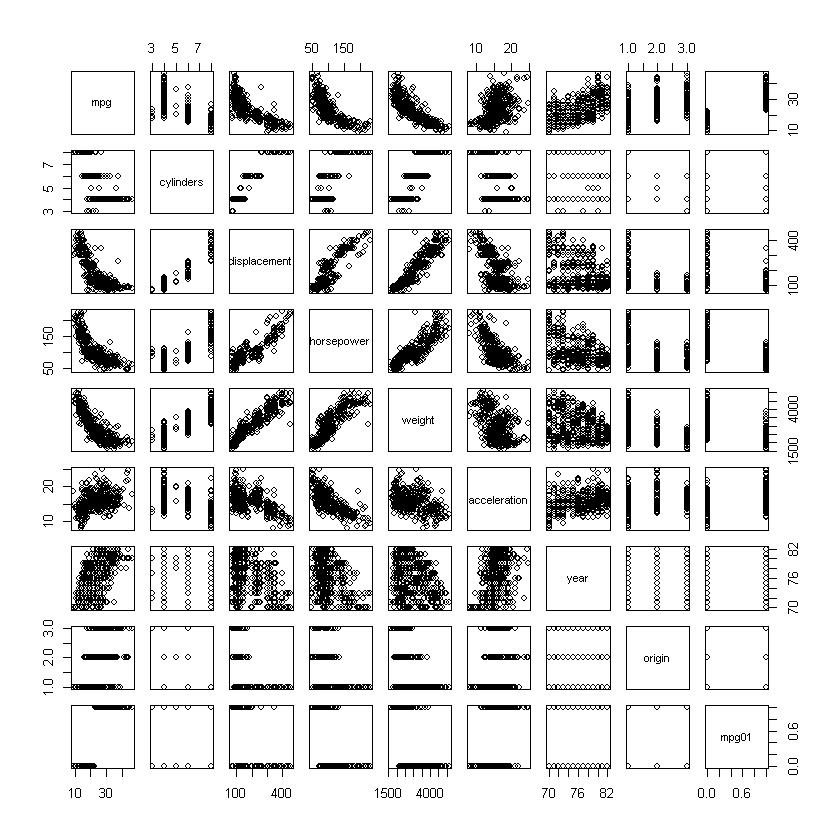

In [44]:
df = movetolast(df, c("name"))
pairs(df[,1:9])

In [45]:
cor(df[,1:9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


  - There is a strong positive correlation between `mpg` and `mpg01`, and a strong negative correlation between `cylinders`, `displacement`, `weight`, `horsepower` and `mpg01`.
  - I will use these variables except `mpg`.`mpg` was used to separate observations into `mpg01` values and so using it can lead to perfectly separating test observations.

ANSWER 11(c) - 

In [53]:
install.packages("caTools")
library(caTools)

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\RtmpyKY3wT\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [54]:
# Training and Test data
require(caTools)
set.seed(123)
sample_data = sample.split(df$mpg, SplitRatio = 0.70)
train2 = subset(df, sample_data==TRUE) 
test2 = subset(df, sample_data==FALSE)

ANSWER 11(d) - 

In [56]:
# LDA model 
lda_fit3 = lda(mpg01 ~ cylinders+displacement+horsepower+weight, data=train2)

# Predictions and confusion matrix
lda_pred3 = predict(lda_fit3,test2)
predictions = lda_pred3$class
actual = test2$mpg01
table(predictions,actual)

           actual
predictions  0  1
          0 48  4
          1  8 44

The test error of this model is 11.5%.

ANSWER 11(e) - 

In [57]:
# QDA model
qda_fit2 = qda(mpg01 ~ cylinders+displacement+horsepower+weight, data=train2)
qda_pred2 = predict(qda_fit2,test2)
predictions = qda_pred2$class
table(predictions,actual)

           actual
predictions  0  1
          0 50  4
          1  6 44

The QDA model has a test error of 9.6%.

ANSWER 11(f) - 

In [58]:
# Logistic regression model
logistic_fit5 = glm(mpg01 ~ cylinders+displacement+horsepower+weight, data=train2, family=binomial)

logistic_probs5 = predict(logistic_fit5,test2, type="response")
logistic_preds5 = rep(0, length(test2$mpg01)) 
logistic_preds5[logistic_probs5>0.5] = 1 

table(logistic_preds5,actual)

               actual
logistic_preds5  0  1
              0 50  4
              1  6 44

The logistic model has a 9.6% test error rate.

ANSWER 11(g) - 

In [59]:
# Train, Test and response matrices.
train2_matrix = data.matrix(train2[,c("cylinders","displacement","weight","horsepower")])
test2_matrix = data.matrix(test2[,c("cylinders","displacement","weight","horsepower")])
train2_y = data.matrix(train2$mpg01)
test2_y = data.matrix(test2$mpg01)

# K=1 and predictions
knn_pred4 = knn(train2_matrix, test2_matrix, train2_y, k=1)
table(knn_pred4, test2_y)

         test2_y
knn_pred4  0  1
        0 45  9
        1 11 39

KNN with K=1 has a test error of 20%.

In [60]:
# K=3 and predictions
knn_pred5 = knn(train2_matrix, test2_matrix, train2_y, k=3)
table(knn_pred5, test2_y)

         test2_y
knn_pred5  0  1
        0 45  5
        1 11 43

KNN with K=3 is has a test error of 15%.

In [61]:
# K=9 and predictions
knn_pred6 = knn(train2_matrix, test2_matrix, train2_y, k=10)
table(knn_pred6, test2_y)

         test2_y
knn_pred6  0  1
        0 45  4
        1 11 44

K=10 leads to a slight improvement in test error(14.4%), with diminishing returns as K gets even higher.